# Check GG chrome version
Go to help --> About GG chrome
<img src="https://raw.githubusercontent.com/barnrang/alien_world_auto/master/alien_images/chrome.png" width=500px>

After you run the block below once, you don't need to for the next time

In [ ]:
# Version 90.xxxx
# !pip install chromedriver-binary

# Version 89.xxxx
!pip install chromedriver-binary==89.0.4389.23.0

# Otherwise please check
# https://pypi.org/project/chromedriver-binary/89.0.4389.23.0/#history

# Import Library

In [1]:
from PIL import Image
import io
import numpy as np
import time

import selenium
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
import chromedriver_binary
from selenium import webdriver

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# Open Browser 

In [3]:
driver = selenium.webdriver.Chrome()  # Optional argument, if not specified will search path.
driver.get('https://play.alienworlds.io/')

# Preparation

## Please close the top notification bar
<img src="https://raw.githubusercontent.com/barnrang/alien_world_auto/master/alien_images/close_top.png" width=600px>

## Login and reach the mining page
You should reach this page!
<img src="https://raw.githubusercontent.com/barnrang/alien_world_auto/master/alien_images//mining_page.png" width=600px>

## Proceed ⇨

# Preparation 2
Just run the following blocks

In [8]:
canvas = driver.find_element_by_id('unityContainer')


style_element = [x.strip() for x in canvas.get_attribute('style').split(';')]
width = int(style_element[0].split(' ')[-1][:-2])
height = int(style_element[1].split(' ')[-1][:-2])

In [16]:
# Width, Height == 1036, 674 for window screen (should be default on window 10 I hope)
# Might have problem if not exactly same (I tried on MACOSX and problem occurred)
# TODO: Make it dynamic to window size
print(f'width={width} and height={height}')
if width != 1036 and height != 674:
    print("There might be problem, I hope I can deal with this soon :P")

width=1200 and height=647
There might be problem, I hope I can deal with this soon :P


In [10]:
mining_button_ref = plt.imread('alien_images/mining_button.png')
claim_button_ref = plt.imread('alien_images/claim_button.png')
return_to_mine_ref = plt.imread('alien_images/return_to_mine.png')
error_to_mine_ref = plt.imread('alien_images/error.png')

def check_if_can_mine():
    data = driver.get_screenshot_as_png()
    img = Image.open(io.BytesIO(data))
    mining_button = np.asarray(img)[740:760, 600:650].astype(np.float32) / 255.
    return (np.mean(np.abs(mining_button_ref - mining_button)) < 0.01)

def check_if_can_claim():
    data = driver.get_screenshot_as_png()
    img = Image.open(io.BytesIO(data))
    mining_button = np.asarray(img)[500:530, 600:680].astype(np.float32) / 255.
    return (np.mean(np.abs(claim_button_ref - mining_button)) < 0.01)

def check_if_can_return():
    data = driver.get_screenshot_as_png()
    img = Image.open(io.BytesIO(data))
    mining_button = np.asarray(img)[680:700, 250:300].astype(np.float32) / 255.
    return (np.mean(np.abs(return_to_mine_ref - mining_button)) < 0.01)

def check_if_error():
    data = driver.get_screenshot_as_png()
    img = Image.open(io.BytesIO(data))
    mining_button = np.asarray(img)[310:330, 600:700].astype(np.float32) / 255.
    return (np.mean(np.abs(error_to_mine_ref - mining_button)) < 0.01)

In [11]:
def press_mining(posx=0, posy=0):
    print(posx,posy)
    action = webdriver.common.action_chains.ActionChains(driver)
    action.move_to_element_with_offset(canvas, posx, posy)
    action.click()
    action.perform()

In [12]:
mining_pos = (510, 600)
claim_pos = (510, 400)
return_to_mining_pos = (250, 560)

possible_error_click = [[760,200], 
                        [760,225],
                        [760,250],
                        [760,275],
                        [760,300]]

# Mining Loop
Run the block below and pray to the god

In [13]:
from IPython.display import clear_output

states = ['pre_mine', 'pre_claim', 'pre_return', 'error']
state ='pre_mine'

wait_long_time = 0

next_state = {
    'pre_mine': 'pre_claim',
    'pre_claim': 'pre_return',
    'pre_return': 'pre_mine'
}

def check_which_state():
    if check_if_error(): return 'error'
    if check_if_can_return(): return 'pre_return'
    if check_if_can_mine(): return 'pre_mine'
    if check_if_can_claim(): return 'pre_claim'
    
    
def check_status_and_press(f, pos, c_state):
    wait_long_time = 0
    while not f():
        wait_long_time += 1
        if wait_long_time > 5:
            wait_long_time = 0
            state = check_which_state()
            if state is None: return c_state
            return state
        time.sleep(20)
        error=check_if_error()
        if error: 
            state = 'error'
            return state
    press_mining(*pos)
    return next_state[c_state]

try:
    while True:
        clear_output(wait=True)
        assert state in states
        if state == 'pre_mine':
            print('Prepare to mine')
            state = check_status_and_press(check_if_can_mine, mining_pos, state)
            
        if state == 'pre_claim':
            print('Prepare to claim')
            state = check_status_and_press(check_if_can_claim, claim_pos, state)

        if state == 'pre_return':
            print('Prepare to return')
            state = check_status_and_press(check_if_can_return, return_to_mining_pos, state)
            
        if state == 'error':
            print('Fix error')
            for coord in possible_error_click:
                press_mining(*coord)
            state = check_which_state()
                
except KeyboardInterrupt:
    pass

Prepare to mine


# There is nothing here go back just my scratch paper

In [97]:
check_if_error()

True

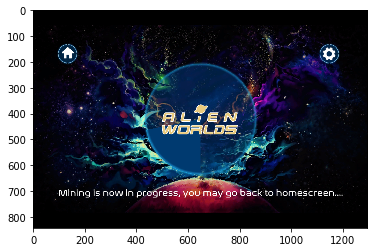

In [28]:
data = driver.get_screenshot_as_png()

img = Image.open(io.BytesIO(data))

claim_button = np.asarray(img)

plt.imshow(claim_button)

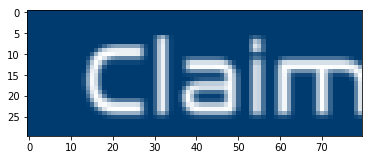

In [65]:
data = driver.get_screenshot_as_png()

img = Image.open(io.BytesIO(data))

claim_button = np.asarray(img)

plt.imshow(claim_button[500:530, 600:680])

In [86]:
check_if_can_return()

False

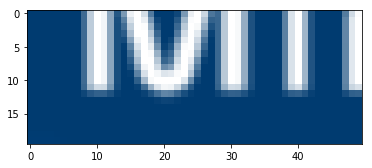

In [51]:
data = driver.get_screenshot_as_png()

img = Image.open(io.BytesIO(data))

return_to_mine = np.asarray(img)

plt.imshow(return_to_mine[680:700, 250:300])

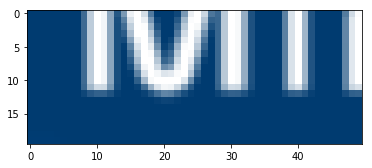

In [54]:
plt.imshow(return_to_mine_ref)

In [42]:
plt.imsave('alien_images/return_to_mine', return_to_mine[640:670, 250:350])

In [66]:
plt.imsave('alien_images/claim_button', claim_button[500:530, 600:680])

In [341]:
press_mining(*return_to_mining_pos)

559 518


In [85]:
check_if_error()

True

In [303]:
data = driver.get_screenshot_as_png()
img = Image.open(io.BytesIO(data))
tmp = np.asarray(img)[740:760, 600:650].astype(np.float32) / 255.

In [281]:
np.mean(mining_button_ref - tmp) < 1e-8

True

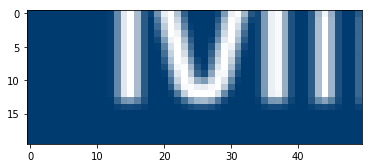

In [291]:
plt.imshow(mining_button_ref)